In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [8]:
data=pd.read_csv("Tele-communication Churn.csv")
data

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,2,AR,area_code_510,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,3,MO,area_code_415,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,4,OR,area_code_415,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,5,PA,area_code_408,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,99998,SD,area_code_510,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no
99998,99999,WI,area_code_415,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes
99999,100000,HI,area_code_415,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no
100000,100001,NC,area_code_408,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no


# 1. Basic Information & Summary

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      100002 non-null  int64  
 1   state           100002 non-null  object 
 2   area.code       100002 non-null  object 
 3   account.length  100002 non-null  int64  
 4   voice.plan      100002 non-null  object 
 5   voice.messages  100002 non-null  int64  
 6   intl.plan       100002 non-null  object 
 7   intl.mins       100002 non-null  float64
 8   intl.calls      100002 non-null  int64  
 9   intl.charge     100002 non-null  float64
 10  day.calls       100002 non-null  int64  
 11  day.charge      100002 non-null  float64
 12  eve.mins        100002 non-null  float64
 13  eve.calls       100002 non-null  int64  
 14  eve.charge      100002 non-null  float64
 15  night.mins      100002 non-null  float64
 16  night.calls     100002 non-null  int64  
 17  night.char

In [10]:
#Data struture
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(100002, 20)


In [11]:
data.shape

(100002, 20)

In [12]:
#data types
data.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.calls           int64
day.charge        float64
eve.mins          float64
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

# 2.DataCleaning & Processing

In [13]:
#drop columns that are not needed
data1= data.drop(["Unnamed: 0","night.mins","intl.mins","eve.mins"], axis =1)
data1


,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,day.calls,day.charge,eve.calls,eve.charge,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,16,no,43,no,14,2.70,67,19.47,161,6.60,68,9.36,6,no
1,AR,area_code_510,29,yes,21,no,15,4.21,88,29.09,92,29.85,114,10.49,2,yes
2,MO,area_code_415,236,yes,44,yes,4,2.23,105,31.79,13,7.34,165,11.85,4,no
3,OR,area_code_415,134,yes,25,yes,18,3.73,136,26.69,84,16.27,66,12.03,8,no
4,PA,area_code_408,102,yes,15,yes,18,0.69,12,28.45,63,8.57,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,SD,area_code_510,61,no,28,no,12,1.48,79,16.03,145,30.62,19,12.80,3,no
99998,WI,area_code_415,145,no,42,yes,18,2.56,13,8.58,99,18.29,83,4.32,1,yes
99999,HI,area_code_415,167,yes,28,no,2,2.28,44,24.99,17,3.69,117,6.59,7,no
100000,NC,area_code_408,194,no,2,yes,10,2.10,8,35.14,130,15.47,111,8.40,4,no


In [14]:
data.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000,100002.000000
mean,50001.500000,121.187286,25.447351,10.008053,9.524220,2.702339,82.149067,29.883185,181.731640,84.389952,15.484086,197.664145,87.129647,8.904653,4.004560
std,28868.235147,69.856979,14.991819,5.773431,5.747165,1.561185,47.628825,17.242000,105.089867,49.180874,8.903875,113.910062,50.605987,5.128778,2.579549
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25001.250000,60.000000,12.000000,5.000000,5.000000,1.350000,41.000000,14.930000,90.500000,42.000000,7.780000,99.300000,43.000000,4.480000,2.000000
50%,50001.500000,121.000000,25.000000,10.000000,10.000000,2.700000,82.000000,29.880000,181.650000,84.000000,15.500000,197.600000,87.000000,8.930000,4.000000
75%,75001.750000,182.000000,38.000000,15.000000,14.000000,4.060000,123.000000,44.830000,273.200000,127.000000,23.160000,296.200000,131.000000,13.330000,6.000000
max,100002.000000,242.000000,51.000000,20.000000,19.000000,5.400000,164.000000,59.760000,363.700000,169.000000,30.910000,395.000000,174.000000,17.770000,8.000000


In [15]:

data["intl.plan"]=pd.to_numeric(data['intl.plan'],errors='coerce')
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state           100002 non-null  object 
 1   area.code       100002 non-null  object 
 2   account.length  100002 non-null  int64  
 3   voice.plan      100002 non-null  object 
 4   voice.messages  100002 non-null  int64  
 5   intl.plan       100002 non-null  object 
 6   intl.calls      100002 non-null  int64  
 7   intl.charge     100002 non-null  float64
 8   day.calls       100002 non-null  int64  
 9   day.charge      100002 non-null  float64
 10  eve.calls       100002 non-null  int64  
 11  eve.charge      100002 non-null  float64
 12  night.calls     100002 non-null  int64  
 13  night.charge    100002 non-null  float64
 14  customer.calls  100002 non-null  int64  
 15  churn           100002 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 12.2+ M

In [17]:
data1.info

<bound method DataFrame.info of        state      area.code  account.length voice.plan  voice.messages  \
0         KS  area_code_415              16         no              43   
1         AR  area_code_510              29        yes              21   
2         MO  area_code_415             236        yes              44   
3         OR  area_code_415             134        yes              25   
4         PA  area_code_408             102        yes              15   
...      ...            ...             ...        ...             ...   
99997     SD  area_code_510              61         no              28   
99998     WI  area_code_415             145         no              42   
99999     HI  area_code_415             167        yes              28   
100000    NC  area_code_408             194         no               2   
100001    RI  area_code_408               3        yes              51   

       intl.plan  intl.calls  intl.charge  day.calls  day.charge  eve.calls  \


<Axes: >

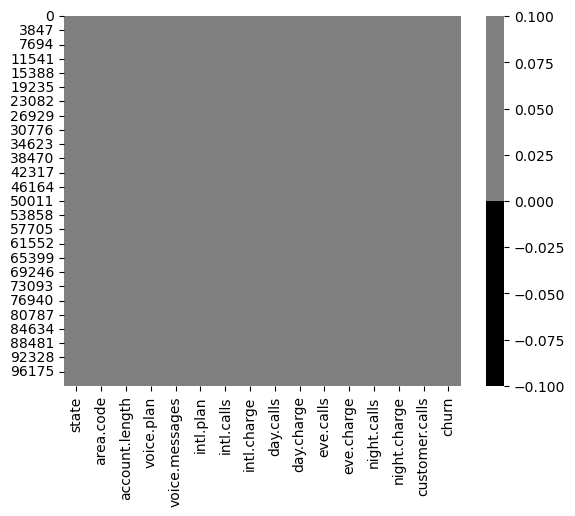

In [27]:
cols = data1.columns
colours = ['black', 'grey']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [29]:
median_customercalls = data1["customer.calls"].median()
mean_customercalls = data1["customer.calls"].mean()
print("Median of customer.calls: ", median_customercalls)
print("Mean of customer.calls: ",mean_customercalls)


Median of customer.calls:  4.0
Mean of customer.calls:  4.0045599088018236


In [31]:
median_daycharge= data1["day.charge"].median()
mean_daycharge = data1["day.charge"].mean()
print("Median of day.charge: ", median_daycharge)
print("Mean of day.charge: ",mean_daycharge)

Median of day.charge:  29.88
Mean of day.charge:  29.883184936301273


In [33]:
data1.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,day.calls,day.charge,eve.calls,eve.charge,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,16,no,43,no,14,2.70,67,19.47,161,6.60,68,9.36,6,no
1,AR,area_code_510,29,yes,21,no,15,4.21,88,29.09,92,29.85,114,10.49,2,yes
2,MO,area_code_415,236,yes,44,yes,4,2.23,105,31.79,13,7.34,165,11.85,4,no
3,OR,area_code_415,134,yes,25,yes,18,3.73,136,26.69,84,16.27,66,12.03,8,no
4,PA,area_code_408,102,yes,15,yes,18,0.69,12,28.45,63,8.57,129,17.71,5,no


In [35]:
data1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
99997     False
99998     False
99999     False
100000    False
100001    False
Length: 100002, dtype: bool

In [37]:
data1.rename({'day.calls': 'daycalls'}, axis=1, inplace = True)
data1

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,daycalls,day.charge,eve.calls,eve.charge,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,16,no,43,no,14,2.70,67,19.47,161,6.60,68,9.36,6,no
1,AR,area_code_510,29,yes,21,no,15,4.21,88,29.09,92,29.85,114,10.49,2,yes
2,MO,area_code_415,236,yes,44,yes,4,2.23,105,31.79,13,7.34,165,11.85,4,no
3,OR,area_code_415,134,yes,25,yes,18,3.73,136,26.69,84,16.27,66,12.03,8,no
4,PA,area_code_408,102,yes,15,yes,18,0.69,12,28.45,63,8.57,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,SD,area_code_510,61,no,28,no,12,1.48,79,16.03,145,30.62,19,12.80,3,no
99998,WI,area_code_415,145,no,42,yes,18,2.56,13,8.58,99,18.29,83,4.32,1,yes
99999,HI,area_code_415,167,yes,28,no,2,2.28,44,24.99,17,3.69,117,6.59,7,no
100000,NC,area_code_408,194,no,2,yes,10,2.10,8,35.14,130,15.47,111,8.40,4,no


In [39]:
print(data1["daycalls"].value_counts())
mode_daycalls = data1["daycalls"].mode()[0]
print(mode_daycalls)

daycalls
98     673
150    671
163    668
135    661
6      660
      ... 
88     567
140    564
142    561
81     557
75     553
Name: count, Length: 165, dtype: int64
98


In [47]:
data1.rename({'eve.calls': 'evecalls'}, axis=1, inplace = True)
data1

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,daycalls,day.charge,evecalls,eve.charge,night.calls,night.charge,customer.calls,churn,night.charge\t
0,KS,area_code_415,16,no,43,no,14,2.70,67,19.47,161,6.60,68,9.36,6,no,9.36
1,AR,area_code_510,29,yes,21,no,15,4.21,88,29.09,92,29.85,114,10.49,2,yes,10.49
2,MO,area_code_415,236,yes,44,yes,4,2.23,105,31.79,13,7.34,165,11.85,4,no,11.85
3,OR,area_code_415,134,yes,25,yes,18,3.73,136,26.69,84,16.27,66,12.03,8,no,12.03
4,PA,area_code_408,102,yes,15,yes,18,0.69,12,28.45,63,8.57,129,17.71,5,no,17.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,SD,area_code_510,61,no,28,no,12,1.48,79,16.03,145,30.62,19,12.80,3,no,12.80
99998,WI,area_code_415,145,no,42,yes,18,2.56,13,8.58,99,18.29,83,4.32,1,yes,4.32
99999,HI,area_code_415,167,yes,28,no,2,2.28,44,24.99,17,3.69,117,6.59,7,no,6.59
100000,NC,area_code_408,194,no,2,yes,10,2.10,8,35.14,130,15.47,111,8.40,4,no,8.40


In [51]:
print(data1["evecalls"].value_counts())
mode_evecalls = data1["evecalls"].mode()[0]
print(mode_evecalls)

evecalls
53     642
14     635
32     634
96     632
144    630
      ... 
105    546
156    544
123    533
106    524
124    520
Name: count, Length: 170, dtype: int64
53


In [57]:
data1.rename({'night.calls': 'nightcalls'}, axis=1, inplace = True)
data1

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,daycalls,day.charge,evecalls,eve.charge,nightcalls,night.charge,customer.calls,churn,night.charge\t
0,KS,area_code_415,16,no,43,no,14,2.70,67,19.47,161,6.60,68,9.36,6,no,9.36
1,AR,area_code_510,29,yes,21,no,15,4.21,88,29.09,92,29.85,114,10.49,2,yes,10.49
2,MO,area_code_415,236,yes,44,yes,4,2.23,105,31.79,13,7.34,165,11.85,4,no,11.85
3,OR,area_code_415,134,yes,25,yes,18,3.73,136,26.69,84,16.27,66,12.03,8,no,12.03
4,PA,area_code_408,102,yes,15,yes,18,0.69,12,28.45,63,8.57,129,17.71,5,no,17.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,SD,area_code_510,61,no,28,no,12,1.48,79,16.03,145,30.62,19,12.80,3,no,12.80
99998,WI,area_code_415,145,no,42,yes,18,2.56,13,8.58,99,18.29,83,4.32,1,yes,4.32
99999,HI,area_code_415,167,yes,28,no,2,2.28,44,24.99,17,3.69,117,6.59,7,no,6.59
100000,NC,area_code_408,194,no,2,yes,10,2.10,8,35.14,130,15.47,111,8.40,4,no,8.40


In [59]:
print(data1["nightcalls"].value_counts())
mode_nightcalls = data1["nightcalls"].mode()[0]
print(mode_nightcalls)

nightcalls
156    620
144    616
73     612
14     612
52     612
      ... 
28     529
75     528
104    527
120    524
76     515
Name: count, Length: 175, dtype: int64
156


In [61]:
mode_nightcharge	 = data1["night.charge"].mode()[0]
data1["night.charge	"] = data1["night.charge"].fillna(mode_nightcharge	)
data1.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.calls        0
intl.charge       0
daycalls          0
day.charge        0
evecalls          0
eve.charge        0
nightcalls        0
night.charge      0
customer.calls    0
churn             0
night.charge\t    0
dtype: int64

In [55]:
data1.tail()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.calls,intl.charge,daycalls,day.charge,evecalls,eve.charge,night.calls,night.charge,customer.calls,churn,night.charge\t
99997,SD,area_code_510,61,no,28,no,12,1.48,79,16.03,145,30.62,19,12.80,3,no,12.80
99998,WI,area_code_415,145,no,42,yes,18,2.56,13,8.58,99,18.29,83,4.32,1,yes,4.32
99999,HI,area_code_415,167,yes,28,no,2,2.28,44,24.99,17,3.69,117,6.59,7,no,6.59
100000,NC,area_code_408,194,no,2,yes,10,2.10,8,35.14,130,15.47,111,8.40,4,no,8.40
100001,RI,area_code_408,3,yes,51,yes,12,3.84,76,24.58,5,2.24,5,5.28,8,yes,5.28


# 3. Churn Rate Analysis


Churn Distribution:
 churn
yes    50.133997
no     49.866003
Name: proportion, dtype: float64


C:\Users\saite\AppData\Local\Temp\ipykernel_9956\1571037156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1["churn"], palette='coolwarm')


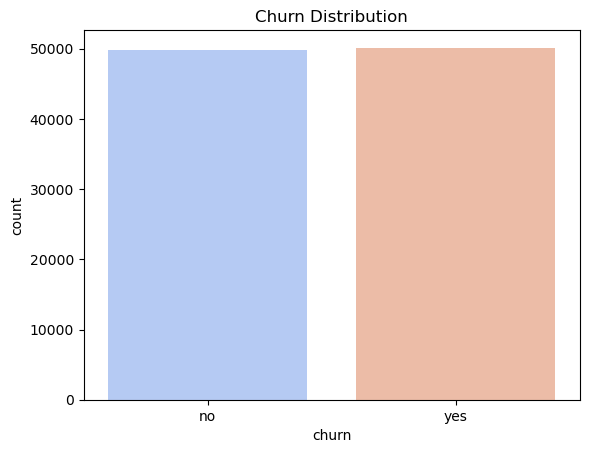

In [71]:
# 3. Churn Rate Analysis
print("\nChurn Distribution:\n", data1["churn"].value_counts(normalize=True) * 100)
sns.countplot(x=data1["churn"], palette='coolwarm')
plt.title("Churn Distribution")
plt.show()


# 4. Distribution of Numerical Features

C:\Users\saite\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


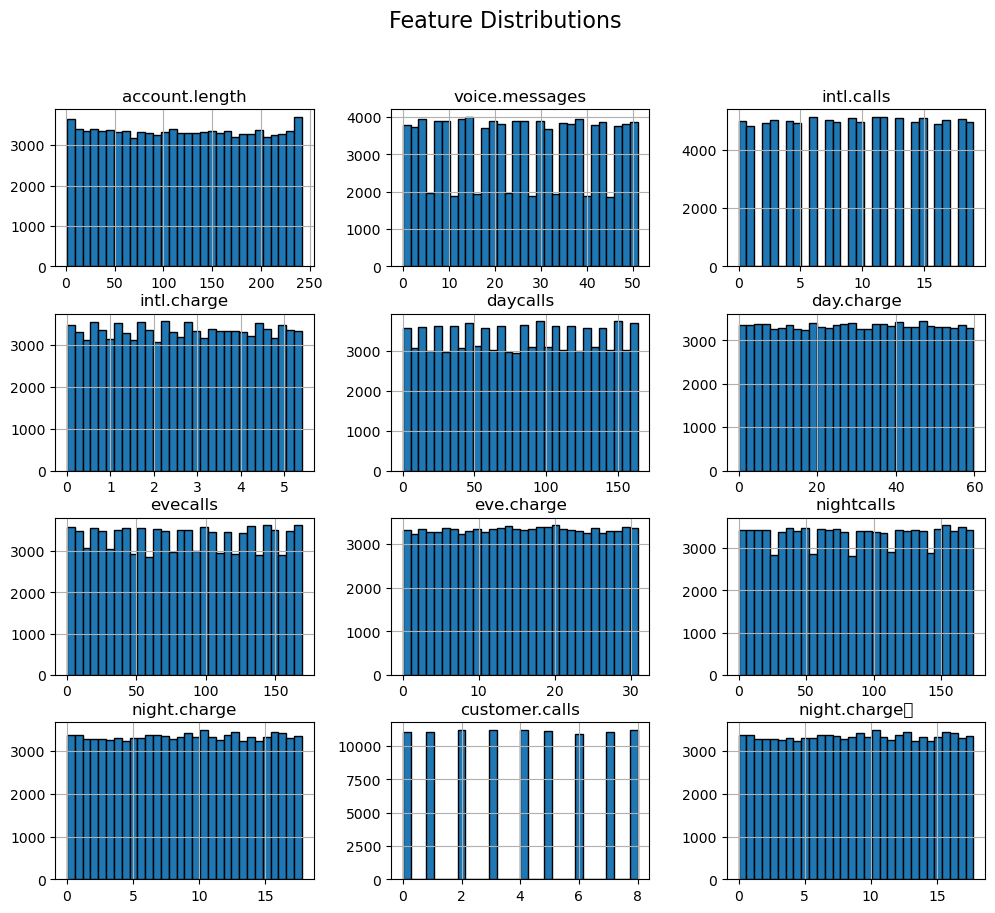

In [73]:
data1.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 5. Correlation Heatmap

C:\Users\saite\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Figure size 1200x800 with 0 Axes>

C:\Users\saite\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


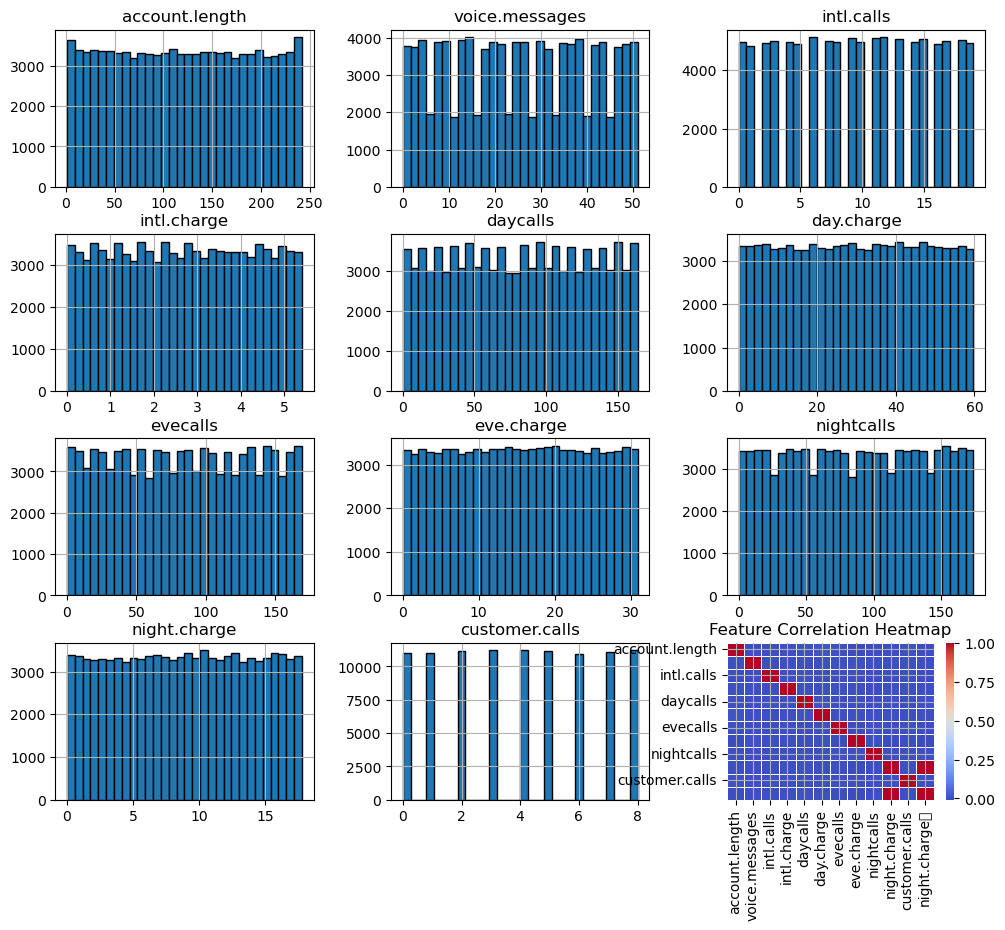

In [81]:
plt.figure(figsize=(12, 8))
data1.select_dtypes(include=['number']).hist(figsize=(12, 10), bins=30, edgecolor='black')
sns.heatmap(data1.select_dtypes(include=['number']).corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 6. Churn Impact on Key Features

C:\Users\saite\AppData\Local\Temp\ipykernel_9956\2791855448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='account.length', data=data1, ax=axes[0, 0], palette='coolwarm')
C:\Users\saite\AppData\Local\Temp\ipykernel_9956\2791855448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='night.charge', data=data1, ax=axes[0, 1], palette='coolwarm')
C:\Users\saite\AppData\Local\Temp\ipykernel_9956\2791855448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='customer.calls', data=data1, ax=axes[1, 0],

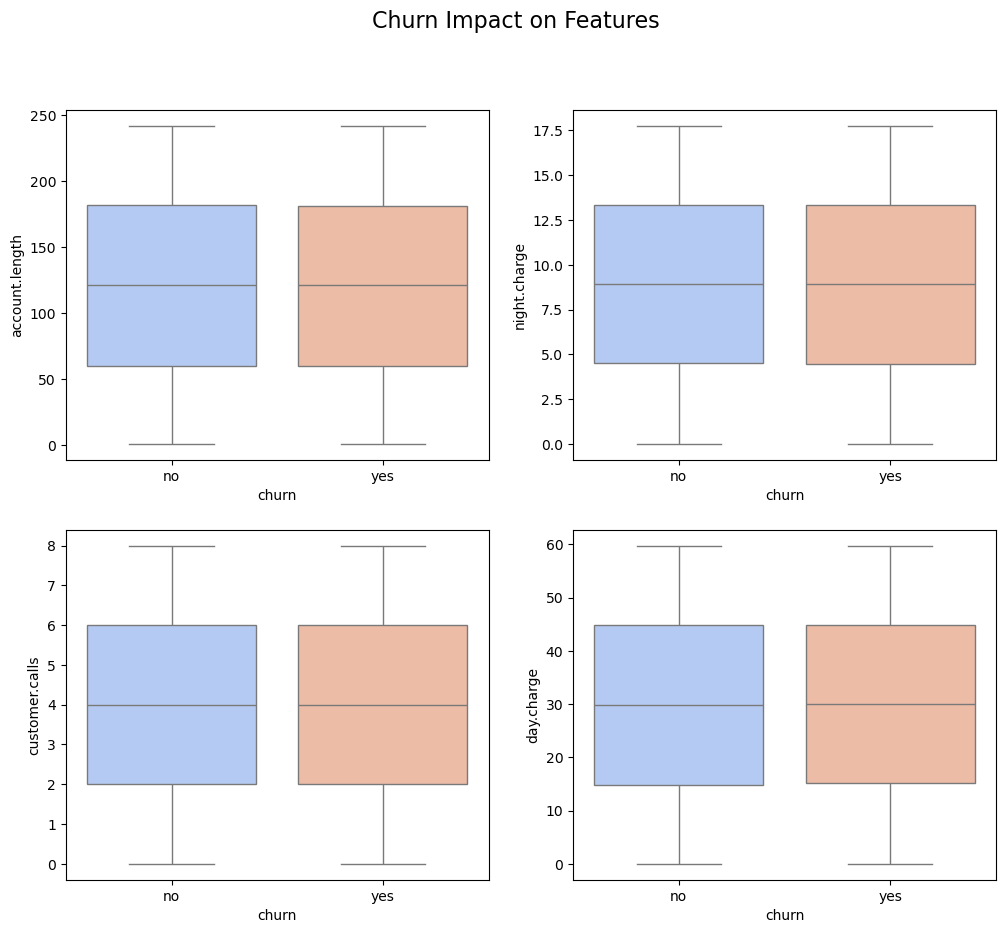

In [88]:
# 6. Churn Impact on Key Features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='churn', y='account.length', data=data1, ax=axes[0, 0], palette='coolwarm')
sns.boxplot(x='churn', y='night.charge', data=data1, ax=axes[0, 1], palette='coolwarm')
sns.boxplot(x='churn', y='customer.calls', data=data1, ax=axes[1, 0], palette='coolwarm')
sns.boxplot(x='churn', y='day.charge', data=data1, ax=axes[1, 1], palette='coolwarm')
plt.suptitle("Churn Impact on Features", fontsize=16)
plt.show()
